  # Smart Crop Irrigation - Week 1

This project predicts the best crop recommendation based on soil and weather data.  
**Week 1 Task:** Data collection, preprocessing, and basic visualization.  

In [28]:
import numpy as np
import pandas as pd
#loading raw data
df = pd.read_csv(r"../data/raw/smart-crop-irrigation.csv")

In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [30]:
# quick info
print(df.shape)
print(df.isnull().sum())

(2200, 8)
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [31]:
# basic stats
display(df.describe())

# checking class balance
display(df['label'].value_counts().sort_values(ascending=False).head(20))

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
Name: count, dtype: int64

In [32]:
df = df.drop_duplicates()

In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("../data/raw/smart-crop-irrigation.csv")

# Step 1: Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", cat_cols)

# Step 2: Handle missing values
# For numeric columns - replace missing with median
num_imp = SimpleImputer(strategy='median')
df[numeric_cols] = num_imp.fit_transform(df[numeric_cols])

# For categorical columns - replace missing with most frequent
cat_imp = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imp.fit_transform(df[cat_cols])

# Step 3: Check if missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())


Numeric Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Categorical Columns: ['label']

Missing values after imputation:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [34]:
# Encode label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [35]:
df.to_csv('../data/processed/smart-crop-irrigation.csv', index=False)

In [36]:
# Save label encoder classes mapping to use later
import joblib
joblib.dump(le, '../data/processed/label_encoder.joblib')

print("Saved preprocessed.csv and label encoder.")

Saved preprocessed.csv and label encoder.


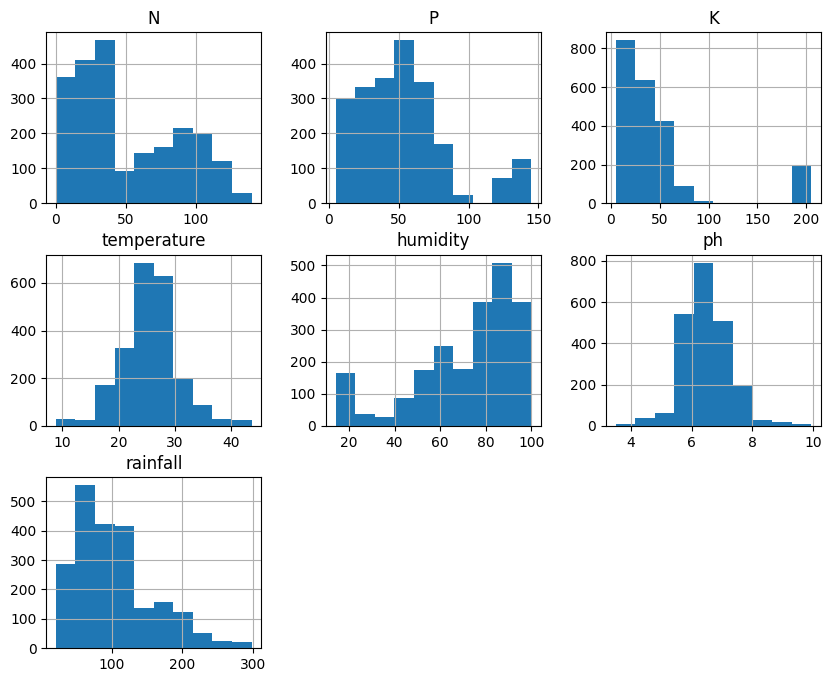

In [37]:
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for features
df[["N","P","K","temperature","humidity","ph","rainfall"]].hist(figsize=(10,8))
plt.show()

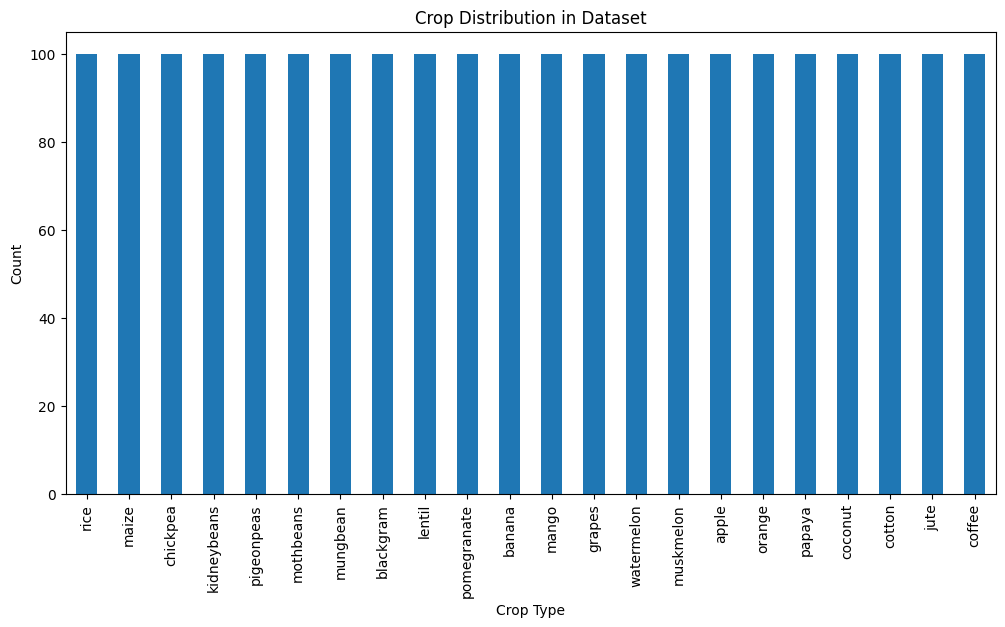

In [38]:
import matplotlib.pyplot as plt

# Example: Count of each crop
plt.figure(figsize=(12,6))
df['label'].value_counts().plot(kind='bar')
plt.title("Crop Distribution in Dataset")
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.show()
